In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style='darkgrid')

from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# plt.rcParams['figure.figsize']=(6,4)
plt.figure(figsize=(6,4))
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

<Figure size 600x400 with 0 Axes>

In [2]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data1=titanic.loc[:,['survived','pclass','age','sibsp','parch','fare']]
data1

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [4]:
import math
def correlation(x, y):
    n=len(x)
    vals=range(n)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0

    for i in vals:
        mul_xy_sum=mul_xy_sum+float(x[i]) * float(y[i])
        x_sum=x_sum + float(x[i])
        y_sum=y_sum + float(y[i])
        x_sum_pow=x_sum_pow + pow(float(x[i]),2) 
        y_sum_pow=y_sum_pow + pow(float(y[i]),2) 


        try:
            r=((n*mul_xy_sum)-(x_sum*y_sum))/math.sqrt(((n*x_sum_pow)-pow(x_sum,2))*((n*y_sum_pow)-(pow(y_sum,2))))
        except:
            print("error")
            r=0.0
        return r

In [5]:
data1.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
titanic.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_11068\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_11068\3366866025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr=titanic.corr()
C:\Users\admin\AppData\Local\Temp\ipykernel_11068\3366866025.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_heatmap=sns.heatmap(titanic.corr(),


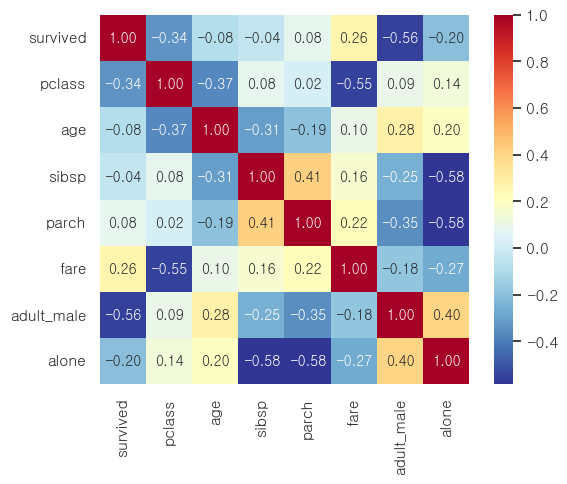

In [13]:
titanic_corr=titanic.corr()
titanic_heatmap=sns.heatmap(titanic.corr(),
                       cbar=True,
                       annot=True,
                       annot_kws={'size':10},
                       fmt='.2f',
                       square=True,
                       cmap='RdYlBu_r'
                       )

C:\Users\admin\AppData\Local\Temp\ipykernel_11068\1353836870.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(titanic_corr, dtype=np.bool)
C:\Users\admin\AppData\Local\Temp\ipykernel_11068\1353836870.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1_heatmap=sns.heatmap(titanic.corr(),


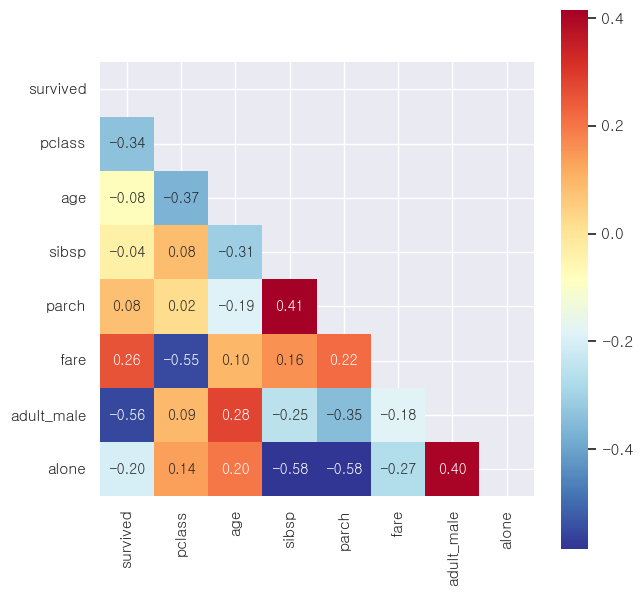

In [14]:
fig, ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(titanic_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

data1_heatmap=sns.heatmap(titanic.corr(),
                       cbar=True,
                       annot=True,
                       annot_kws={'size':10},
                       fmt='.2f',
                       square=True,
                       cmap='RdYlBu_r',
                       mask=mask,
                       )